In [3]:
using Plots
using LinearAlgebra
include("../src/Classification/logistic_regression.jl")

logistic_regression (generic function with 1 method)

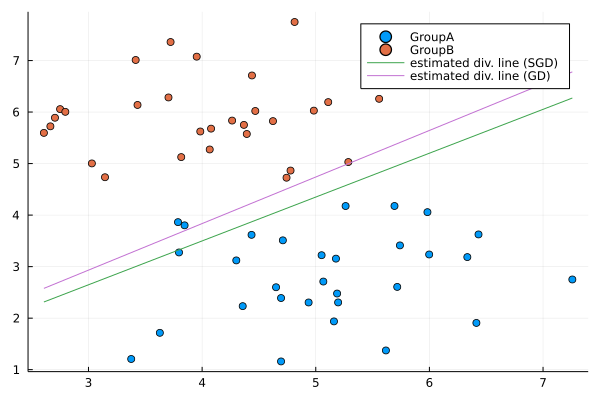

In [4]:
# データ
NA = 30
NB = 30
xA = randn(NA).+5
yA = randn(NA).+3
xB = randn(NB).+4
yB = randn(NB).+6
IndMat = ones(NA+NB,3)
for i in 1:NA;       IndMat[i,1]=xA[i]; IndMat[i,2]=yA[i]; end
for i in NA+1:NA+NB; IndMat[i,1]=xB[i-NA]; IndMat[i,2]=yB[i-NA]; end
DepVec = append!(ones(NA),zeros(NB))
# 推定
η(t) = 0.01 / sqrt(1+t)
ϵ = 1e-4
MAX_EPOCHS = 1000
w_sgd = logistic_regression(IndMat, DepVec, SGD(zeros(size(IndMat,2)), η, ϵ, MAX_EPOCHS))
w_gd  = logistic_regression(IndMat, DepVec, GD(zeros(size(IndMat,2)), η, ϵ, MAX_EPOCHS))
# 描画
scatter(xA,yA,label="GroupA")
scatter!(xB,yB,label="GroupB")
f(x,w) = -w[1]/w[2]*x - w[3]/w[2]
xs = [min(minimum(xA),minimum(xB)), max(maximum(xA),maximum(xB))]
plot!(xs,x->f(x,w_sgd),label="estimated div. line (SGD)")
plot!(xs,x->f(x,w_gd),label="estimated div. line (GD)")